# Import Libaries

In [ ]:
# Testing your installation
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print('TensorFlow: ', tf.__version__)
print('Keras', keras.__version__)

TensorFlow:  2.7.0
Keras 2.7.0


# Import Data

In [ ]:
#Read data as csv 
df = pd.read_csv('churn_modeling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


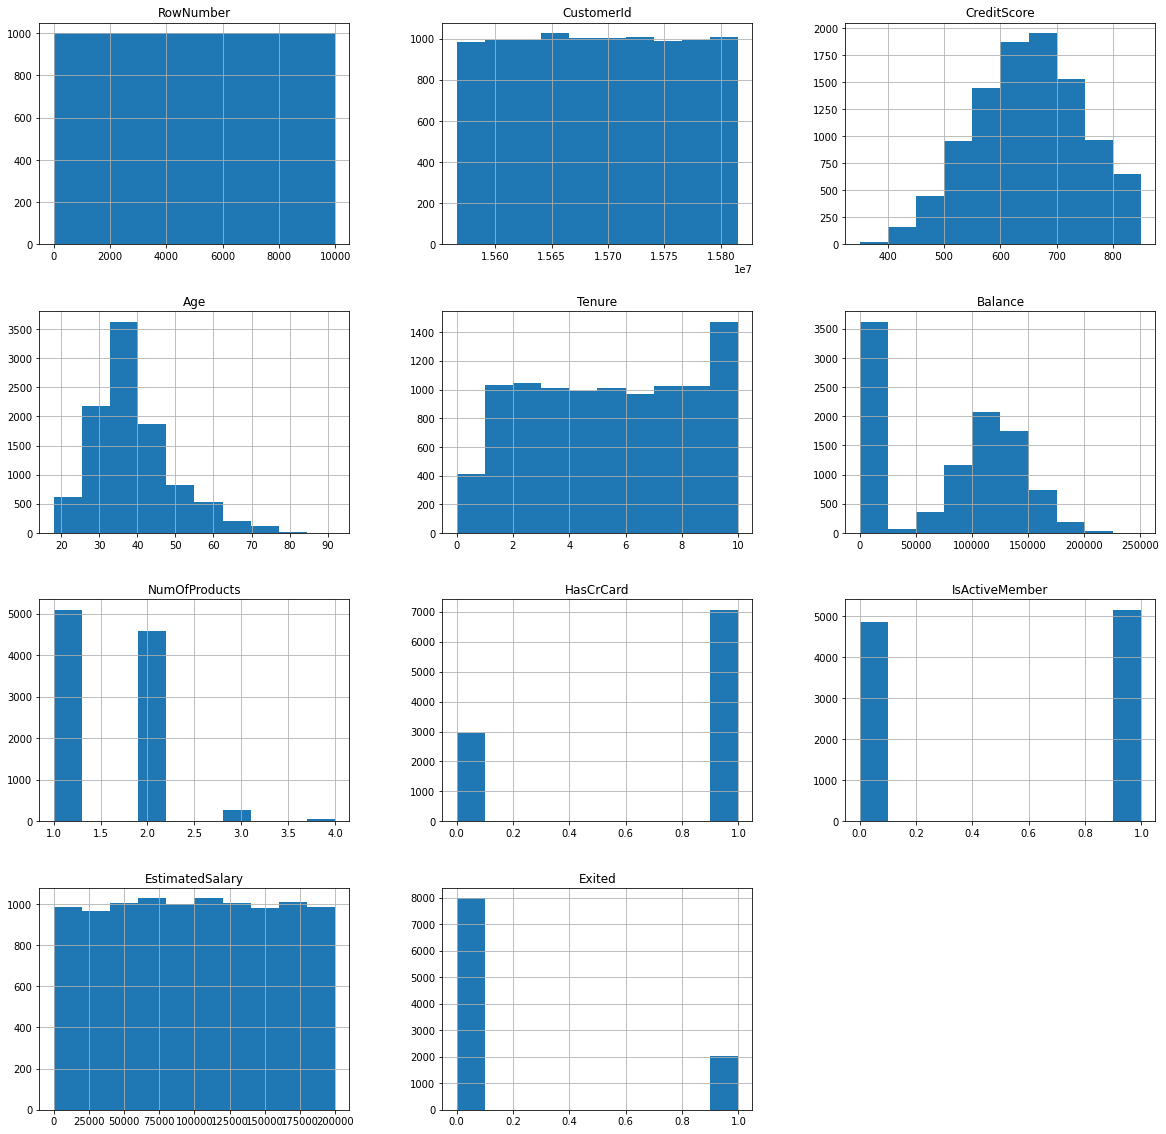

In [ ]:
#Histogram Plot for each input variable

pd.plotting.hist_frame(df,figsize=(20,20))
plt.show()

# Prepare Data

In [ ]:
#drop  ID and SureNmase features 

df = df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#summary of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# df = pd.get_dummies(df)
# df.head()

In [ ]:
X=df.drop('Exited', axis=1)
y = df['Exited']
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# # transform the dataset
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)
X_train[:1]

array([[-0.17298471,  0.28920217,  1.7311989 , -1.21891593, -0.91276854,
        -1.5421992 ,  0.968496  , -0.35204406]])

# Train And Test

In [ ]:
from tensorflow.keras import layers
from keras.layers import Dropout


model = tf.keras.models.Sequential()
model.add(layers.Dense(20,input_dim=X_train.shape[1], name='input',activation='relu', kernel_initializer='he_normal'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 20)                180       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adamax',
             metrics=['accuracy'])

In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train,
                    epochs=35,
                    validation_split=0.1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/35
211/211 [==============================] - 1s 3ms/step - loss: 0.5448 - accuracy: 0.7542 - val_loss: 0.4959 - val_accuracy: 0.7920
Epoch 2/35
211/211 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7967 - val_loss: 0.4726 - val_accuracy: 0.7933
Epoch 3/35
211/211 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7997 - val_loss: 0.4562 - val_accuracy: 0.8107
Epoch 4/35
211/211 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8059 - val_loss: 0.4445 - val_accuracy: 0.8147
Epoch 5/35
211/211 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8104 - val_loss: 0.4349 - val_accuracy: 0.8120
Epoch 6/35
211/211 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8160 - val_loss: 0.4270 - val_accuracy: 0.8067
Epoch 7/35
211/211 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8172 - val_loss: 0.4199 - val_accuracy: 0.8133
Epoch 

In [ ]:
model.evaluate(X_test, y_test)
# evaluate the keras model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss,test_accuracy = model.evaluate(X_test, y_test)
print('Train Accuracy: %.2f' % (train_accuracy*100))
print('Test Accuracy: %.2f' % (test_accuracy*100))

79/79 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8512
Train Accuracy: 85.61
Test Accuracy: 85.12
